In [1]:
import movie_data
import functions
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import numpy as np
import nltk
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ahmad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
np.random.seed(5)

In [3]:
data = movie_data.get_data()

C:\Users\ahmad\Desktop\concordia-bootcamps\ds-project-data-engineering-3\movie_data.py:42: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 42 of the file C:\Users\ahmad\Desktop\concordia-bootcamps\ds-project-data-engineering-3\movie_data.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = bs(r.content)


In [4]:
data

,Title,Plot
0,The Shawshank Redemption,Two imprisoned men bond over a number of years...
1,The Godfather,The aging patriarch of an organized crime dyna...
2,The Dark Knight,When the menace known as the Joker wreaks havo...
3,The Lord of the Rings: The Return of the King,Gandalf and Aragorn lead the World of Men agai...
4,Schindler's List,"In German-occupied Poland during World War II,..."
...,...,...
95,North by Northwest,A New York City advertising executive goes on ...
96,Vertigo,A former San Francisco police detective juggle...
97,Singin' in the Rain,A silent film star falls for a chorus girl jus...
98,Citizen Kane,Following the death of publishing tycoon Charl...


In [5]:
data.iloc[0,1]

'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.'

In [21]:
functions.tokenize_and_stem(data.iloc[0,1])

['two',
 'imprison',
 'men',
 'bond',
 'over',
 'a',
 'number',
 'of',
 'year',
 'find',
 'solac',
 'and',
 'eventu',
 'redempt',
 'through',
 'act',
 'of',
 'common',
 'decenc']

In [7]:
# Instantiate TfidfVectorizer object with tokenizer
# parameters for efficient processing of text

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2,
                                 use_idf=True, tokenizer=functions.tokenize_and_stem,
                                 ngram_range=(1,3))

In [8]:
# Fit and transform the tfidf_vectorizer with the "plot" of each movie
# to create a vector representation of the plot summaries
tfidf_matrix = tfidf_vectorizer.fit_transform([x for x in data["Plot"]])

print(tfidf_matrix.shape)

(100, 12)


In [9]:
# Create a KMeans object with 5 clusters and save as km
km = KMeans(n_clusters=5)

# Fit the k-means object with tfidf_matrix
km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

# Create a column cluster to denote the generated cluster for each movie
data["cluster"] = clusters

# Display number of films per cluster (clusters from 0 to 4)
data['cluster'].value_counts() 

1    28
0    26
3    19
2    15
4    12
Name: cluster, dtype: int64

Text(0, 0.5, 'Nb of Movies')

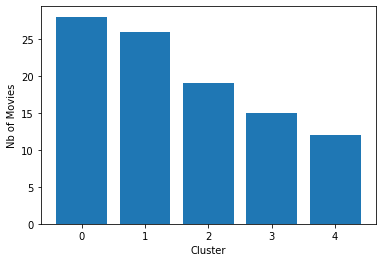

In [10]:
plt.bar([0,1,2,3,4],data['cluster'].value_counts())

plt.xlabel('Cluster')
plt.ylabel('Nb of Movies')

In [11]:
# Calculate the similarity distance
similarity_distance = 1 - cosine_similarity(tfidf_matrix)

In [13]:
similarity_distance

array([[ 0.00000000e+00,  5.38943892e-01,  1.27089901e-01, ...,
         6.88236389e-01,  3.08329904e-01,  8.29698158e-01],
       [ 5.38943892e-01,  0.00000000e+00,  3.51307368e-01, ...,
         5.07894283e-01,  1.95873305e-01,  6.60545894e-01],
       [ 1.27089901e-01,  3.51307368e-01,  0.00000000e+00, ...,
         5.99505671e-01,  1.57043981e-01,  9.38546743e-01],
       ...,
       [ 6.88236389e-01,  5.07894283e-01,  5.99505671e-01, ...,
        -2.22044605e-16,  6.36511586e-01,  2.43094166e-01],
       [ 3.08329904e-01,  1.95873305e-01,  1.57043981e-01, ...,
         6.36511586e-01,  0.00000000e+00,  9.02612239e-01],
       [ 8.29698158e-01,  6.60545894e-01,  9.38546743e-01, ...,
         2.43094166e-01,  9.02612239e-01,  0.00000000e+00]])

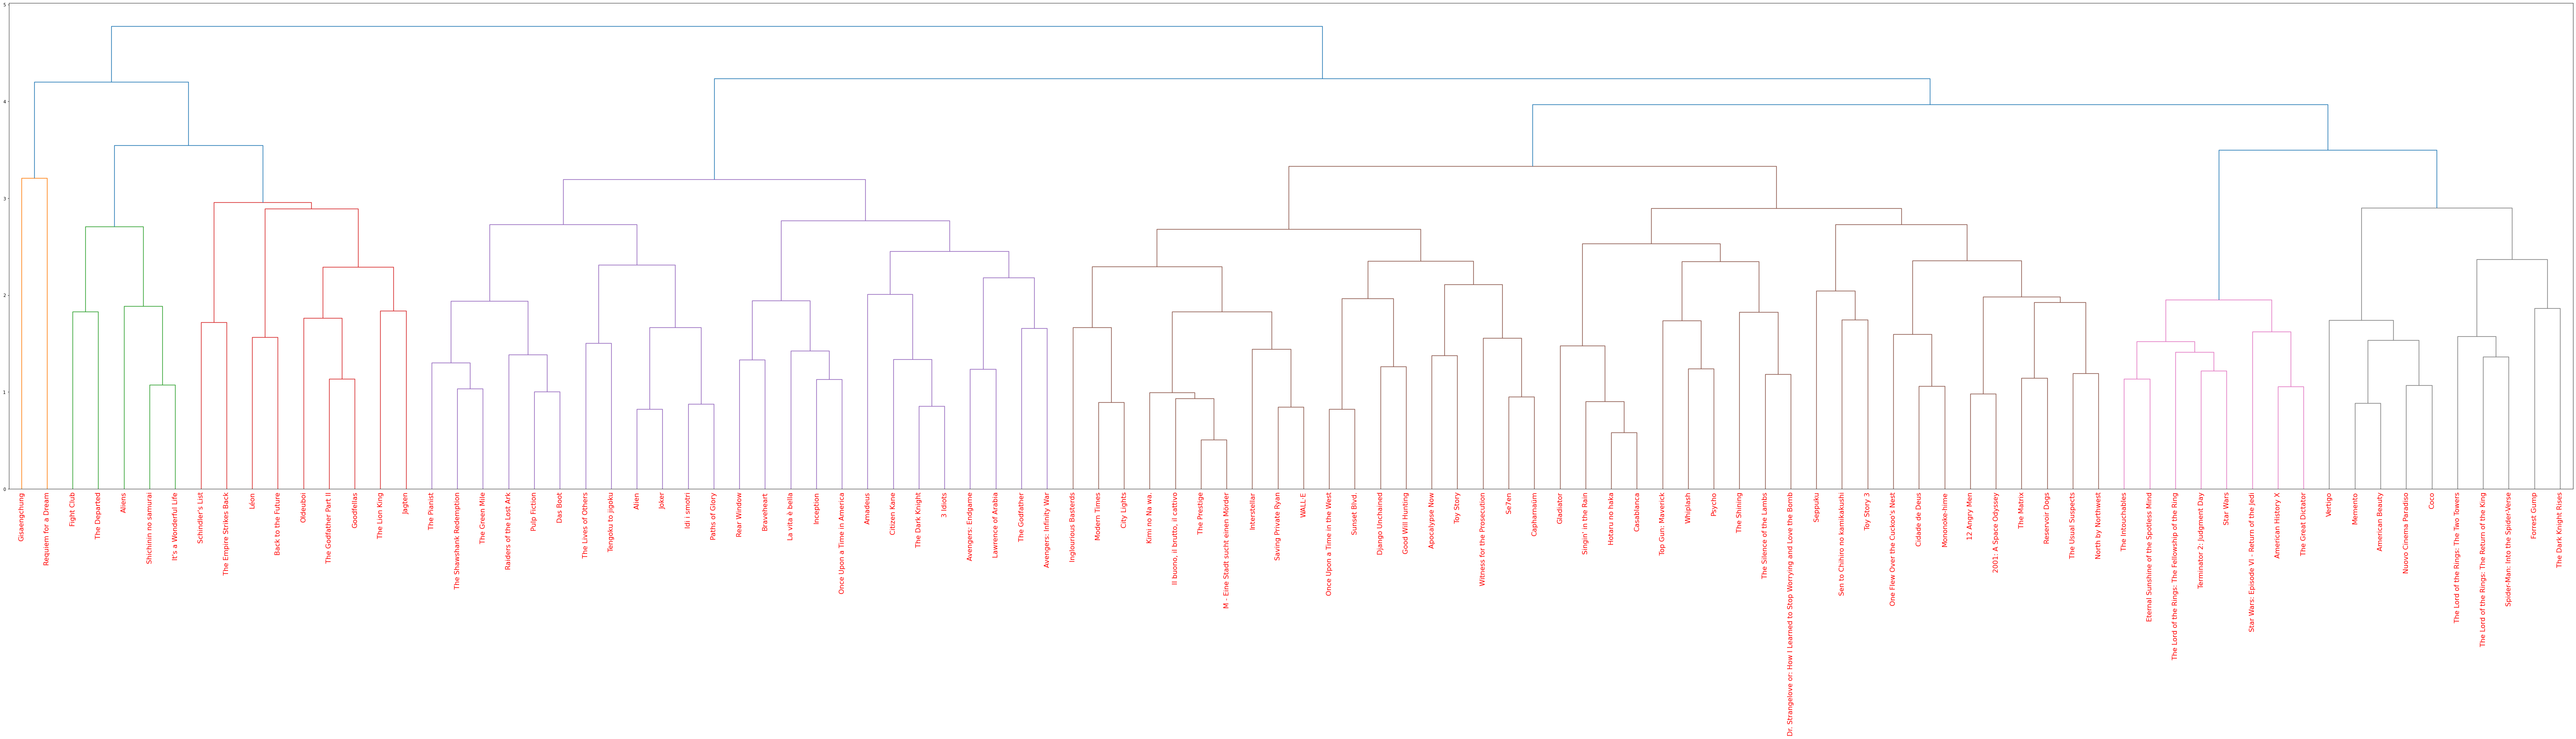

In [18]:
# Create mergings matrix 
mergings = linkage(similarity_distance, method='complete')

# Plot the dendrogram, using title as label column
dendrogram_ = dendrogram(mergings,
               labels=[x for x in data["Title"]],
               leaf_rotation=90,
               leaf_font_size=16,
)

# Adjust the plot
fig = plt.gcf()
_ = [lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(108, 21)

# Show the plotted dendrogram
plt.show()